# Introducción a los métodos de Monte-Carlo con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, análisis de datos y python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Métodos de Monte Carlo" title="Métodos de Monte Carlo" src="http://relopezbriega.github.io/images/monte-carlo-methods.jpg" >

## Introducción

En el cierre de mi [artículo anterior](http://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/), comentaba sobre la sorprendente influencia que han tenido los [números aleatorios](https://es.wikipedia.org/wiki/N%C3%BAmero_aleatorio), que junto con el poder de cálculo que nos proporcionan las computadoras modernas; nos han ayudado a resolver muchos de los problemas numéricos más complejos en ciencia, ingeniería, [finanzas](http://relopezbriega.github.io/category/finanzas.html) y [estadísticas](http://relopezbriega.github.io/category/pobabilidad-y-estadistica.html). En esencia, detrás de cada una de esas soluciones encontramos una familia de métodos que se conocen bajo el nombre de [Métodos de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo).

## ¿Qué son los métodos de Monte-Carlo?

Los [Métodos de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) son técnicas para analizar fenómenos por medio de [algoritmos computacionales](https://es.wikipedia.org/wiki/Algoritmo), que utilizan y dependen fundamentalmente de la generación de [números aleatorios](https://es.wikipedia.org/wiki/N%C3%BAmero_aleatorio). El término Monte-Carlo, hace referencia al [casino de Montecarlo](https://es.wikipedia.org/wiki/Casino_de_Montecarlo), una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la [aleatoriedad](https://es.wikipedia.org/wiki/Aleatoriedad) inherente que poseen. El estudio de los [Métodos de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) requiere un conocimiento detallado en una amplia gama de campos; por ejemplo, la *[probabilidad](http://relopezbriega.github.io/tag/probabilidad.html)* para describir los experimentos y procesos aleatorios, la *[estadística](http://relopezbriega.github.io/tag/estadistica.html)* para analizar los datos, las [ciencias de la computación](https://es.wikipedia.org/wiki/Ciencias_de_la_computaci%C3%B3n) para implementar eficientemente los [algoritmos](https://es.wikipedia.org/wiki/Algoritmo) y la *programación matemática* para formular y resolver problemas de <a href="https://es.wikipedia.org/wiki/Optimizaci%C3%B3n_(matem%C3%A1tica)">optimización</a>.

Como los [Métodos de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) dependen en gran medida de la posibilidad de producir, con una computadora, un flujo infinito de [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) para todo tipo de [distribuciones](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/); no podemos hablar de los [Métodos de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo), sin antes explicar los [números aleatorios](https://es.wikipedia.org/wiki/N%C3%BAmero_aleatorio) y como podemos generarlos con la ayuda de una computadora.

## Números aleatorios y Monte-Carlo

En el corazón de los [Métodos de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) encontramos un *[generador de números aleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_aleatorios)*, es decir un procedimiento que produce un flujo infinito de [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria), que generalmente se encuentran en el intervalo (0, 1); los cuales son independientes y están uniformemente distribuidos de acuerdo a una [distribución de probabilidad](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/). La mayoría de los lenguajes de programación hoy en día contienen un [generador de números aleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_aleatorios) por defecto al cual simplemente debemos ingresarle un valor inicial, generalmente llamado **seed** o semilla, y que luego en cada invocación nos va a devolver un secuencia uniforme de [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) independientes en el intervalo (0, 1). 

### Números pseudoaleatorios

El concepto de una secuencia infinita de [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) es una abstracción matemática que puede ser imposible de implementar en una computadora. En la práctica, lo mejor que se puede hacer es producir una secuencia de números *pseudoaleatorios* con propiedades estadísticas que son indistinguibles de las de una verdadera secuencia de [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria). Aunque actualmente métodos de generación física basados en la radiación de fondo o la mecánica cuántica parecen ofrecer una fuente estable de números verdaderamente [aleatorios](https://es.wikipedia.org/wiki/N%C3%BAmero_aleatorio) , la gran mayoría de los [generadores de números aleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_aleatorios) que se utilizan hoy en día están basados en algoritmos simples que pueden ser fácilmente implementados en una computadora; por lo que en realidad son [generadores de números pseudoaleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_pseudoaleatorios).


### Números aleatorios en Python

En [Python](http://python.org/) el módulo `random` nos proporciona un rápido [generador de números pseudoaleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_pseudoaleatorios) basado en el algoritmo [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister); el cual genera números con una distribución casi uniforme y un período grande, haciéndolo adecuado para una amplia gama de aplicaciones. Veamos un pequeño ejemplo.

In [1]:
# Utilizando random para genera números aleatorios.
import random

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

In [2]:
random.random() # segundo llamado a random

0.49420568181919666

In [3]:
for i in range(5):
    print(random.random()) # 5 números aleatorios

0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


In [4]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984) 
for i in range(7):
    print(random.random()) # Mismos resultados que arriba.

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


En este ejemplo podemos ver como la función `random` genera números aleatorios entre 0 y 1, también podemos ver como con el uso de `seed` podemos replicar el comportamiento aleatorio. 

### Elegir un buen generador de números aleatorios

Existe una gran variedad de [generadores de números aleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_aleatorios) que podemos elegir; pero elegir un buen [generador de números aleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_aleatorios) es como elegir un coche nuevo: para algunas personas o aplicaciones la velocidad es primordial, mientras que para otros la robustez y la fiabilidad son más importantes. Para la [simulación de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) las propiedades distributivas de los [generadores aleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_aleatorios) es primordial, mientras que en la criptografía la imprevisibilidad es crucial. Por tal motivo, el generador que vayamos a elegir dependerá de la aplicación que le vayamos a dar.

## Monte-Carlo en acción

Los [Métodos de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) se basan en la analogía entre [probabilidad](http://relopezbriega.github.io/tag/probabilidad.html) y volumen. Las *matemáticas de las medidas* formalizan la noción intuitiva de [probabilidad](http://relopezbriega.github.io/tag/probabilidad.html), asociando un evento con un conjunto de resultados y definiendo  que la [probabilidad](http://relopezbriega.github.io/tag/probabilidad.html) del evento será el volumen o medida relativa del universo de posibles resultados. [Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) usa esta identidad a la inversa, calculando el volumen de un conjunto interpretando el volumen como una [probabilidad](http://relopezbriega.github.io/tag/probabilidad.html). En el caso más simple, esto significa muestrear aleatoriamente un universo de resultados posibles y tomar la fracción de muestras aleatorias que caen en un conjunto dado como una estimación del volumen del conjunto. La [ley de grandes números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros) asegura que esta estimación converja al valor correcto a medida que aumenta el número de muestras. El [teorema del límite central](https://es.wikipedia.org/wiki/Teorema_del_l%C3%ADmite_central) proporciona información sobre la magnitud del probable error en la estimación después de un número finito de muestras. 
En esencia podemos decir que el [Método de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) consiste en calcular o aproximar ciertas expresiones a través de adivinarlas con la ayuda de dibujar una cantidad normalmente grande de números aleatorios. 
Veamos como funciona con un ejemplo, calculemos el área de un círculo de radio 1; lo que es lo mismo a decir que aproximemos el valor de [$\pi$](http://relopezbriega.github.io/blog/2015/03/14/el-dia-pi/).

In [5]:
# <!-- collapse=True -->
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

np.random.seed(1984) # para poder replicar el random

%matplotlib inline

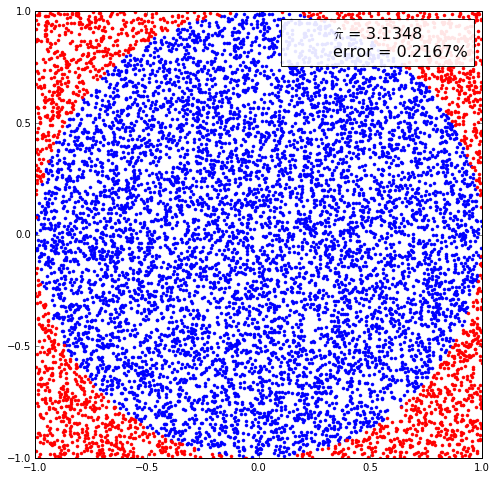

In [6]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

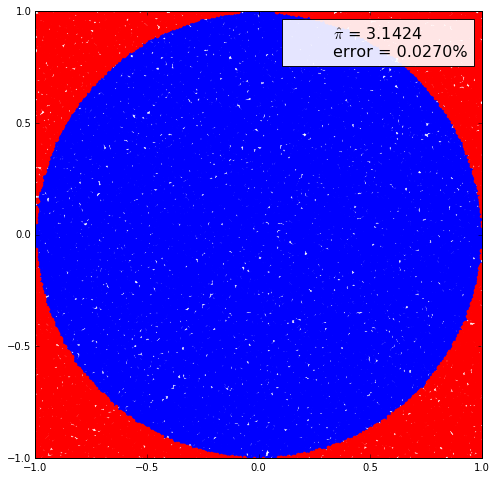

In [7]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

Como vemos en este ejemplo, para calcular el área del círculo realizamos un gran número de experimentos aleatorios, en el primer ejemplo utilizamos 10,000 experimentos; y luego calculamos el área obteniendo una [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) de los valores que caen dentro de la superficie del círculo. Debemos hacer notar que incluso utilizando un gran número de experimentos aún así en el primer ejemplo no logramos obtener los primeros dos decimales correctos; recién en el segundo ejemplo, cuando utilizamos 100,000 experimentos logramos obtener los primeros dos dígitos correctos; esto demuestra que el [Método de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) en su versión más cruda tarda bastante en [converger](https://es.wikipedia.org/wiki/Convergencia_en_probabilidad).

### Técnicas de reducción de varianza

Existen varias técnicas generales para la [reducción de la varianza](https://en.wikipedia.org/wiki/Variance_reduction), estos métodos mejoran la precisión y la tasa de [convergencia](https://es.wikipedia.org/wiki/Convergencia_en_probabilidad) de la [integración](https://es.wikipedia.org/wiki/Integraci%C3%B3n) por medio del [Método de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) sin aumentar el número de experimentos. Algunas de estas técnicas son:

* **[Muestreo de importancia](https://en.wikipedia.org/wiki/Importance_sampling)**: La idea principal detrás del  [Muestreo de importancia](https://en.wikipedia.org/wiki/Importance_sampling) es simplemente encontrar una distribución para la variable aleatoria subyacente que asigne una alta probabilidad a aquellos valores que son importantes para calcular la cantidad que nos interesa determinar.
* **[Muestreo estratificado](https://es.wikipedia.org/wiki/Muestreo_estratificado)**: El principal principio subyacente al [Muestreo estratificado](https://es.wikipedia.org/wiki/Muestreo_estratificado) es natural: tomar una muestra de una pequeña subpoblación que refleje las propiedades del total de la población tanto como sea posible.
* **[Variantes de control](https://en.wikipedia.org/wiki/Control_variates)**: El método de las [Variantes de control](https://en.wikipedia.org/wiki/Control_variates) explota la información sobre los errores en las estimaciones de las cantidades conocidas para reducir el error de una estimación de una cantidad desconocida. 
* **[Variaciones antitéticas](https://en.wikipedia.org/wiki/Antithetic_variates)**: El método de las [Variaciones antitéticas](https://en.wikipedia.org/wiki/Antithetic_variates) es el método de [reducción de la varianza](https://en.wikipedia.org/wiki/Variance_reduction), más fácil. Se basa en la idea de combinar una selección aleatoria de puntos con una opción sistemática. Su principal principio es la [reducción de la varianza](https://en.wikipedia.org/wiki/Variance_reduction), mediante la introducción de la simetría.

Excede al alcance de este artículo el profundizar en cada una de estas técnicas, pueden encontrar un análisis más detallado de las mismas en el siguiente [enlace](http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-4.html) (en inglés). 

## Métodos de Monte-Carlo via cadenas de Markov 

El desarrollo de los [métodos de Monte-Carlo via cadenas de Markov](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo), o [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) por sus siglas en inglés, es sin duda uno de los mayores avances en el enfoque computacional de la [estadística](http://relopezbriega.github.io/tag/estadistica.html). Muchos de los problemas que son intratables utilizando un enfoque *analítico* a menudo pueden ser resueltos utilizando alguna forma de [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo), incluso aunque se trate de problemas en varias [dimensiones](https://es.wikipedia.org/wiki/Dimensi%C3%B3n). 
Las técnicas [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) se aplican para resolver problemas de [integración](https://es.wikipedia.org/wiki/Integraci%C3%B3n) y <a href="https://es.wikipedia.org/wiki/Optimizaci%C3%B3n_(matem%C3%A1tica)">optimización</a> en grandes [espacios dimensionales](https://es.wikipedia.org/wiki/Espacio_de_Hilbert). Estos dos tipos de problemas desempeñan un papel fundamental en [machine learning](http://relopezbriega.github.io/category/machine-learning.html), [física](https://es.wikipedia.org/wiki/F%C3%ADsica), [estadística](http://relopezbriega.github.io/tag/estadistica.html), [econometría](https://es.wikipedia.org/wiki/Econometr%C3%ADa) y el [análisis de decisiones](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_decisi%C3%B3n).

### ¿Qué es una cadena de Markov?

Una [cadena de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov) es un objeto matemático que consiste en una secuencia de estados y un conjunto de [probabilidades](http://relopezbriega.github.io/tag/probabilidad.html) que describen las *transiciones entre esos estados*. La característica principal que tiene esta cadena es que la probabilidad de moverse a otros estados **depende solamente del estado actual**. Dada una cadena, se puede realizar una [caminata aleatoria](https://es.wikipedia.org/wiki/Camino_aleatorio) eligiendo un punto de partida y moviéndose a otros estados siguiendo las *[probabilidades](http://relopezbriega.github.io/tag/probabilidad.html) de transición*. Si de alguna manera encontramos una [cadena de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov) con *transiciones proporcionales* a la distribución que queremos probar, el <a href="https://es.wikipedia.org/wiki/Muestreo_(estad%C3%ADstica)">muestreo</a> se convierte simplemente en una cuestión de moverse entre los estados de esta cadena.

#### Caminata aleatoria en un grafo

Una [cadena de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov) puede ser ilustrada con el siguiente [grafo](https://es.wikipedia.org/wiki/Grafo), el cual representa una [cadena de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov) de cuatro estados.

<img alt="Cadena de Markov" title="Cadena de Markov" src="http://relopezbriega.github.io/images/MC.png" >

Los estados de la cadena se representan como los nodos del [grafo](https://es.wikipedia.org/wiki/Grafo), una <a href="https://es.wikipedia.org/wiki/Arista_(teor%C3%ADa_de_grafos)" >arista</a> de dirección se extiende de un nodo $x$ hacia otro nodo $y$ si la transición de $x$ hacia $y$ es posible en una iteración. Cada una de estas <a href="https://es.wikipedia.org/wiki/Arista_(teor%C3%ADa_de_grafos)" >aristas</a> de dirección tienen una [probabilidad](http://relopezbriega.github.io/tag/probabilidad.html) asociada $P_{xy}$; esta es la [probabilidad](http://relopezbriega.github.io/tag/probabilidad.html) de que el nodo sea elegido en la siguiente iteración cuando la cadena se encuentra en el estado $x$. La cadena comienza en algún estado, digamos $X_0$, que puede ser elegido en forma [aleatoria](https://es.wikipedia.org/wiki/Aleatoriedad) de acuerdo con una [distribución](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) inicial o simplemente asignado en forma arbitraria. Desde allí, la cadena se mueve de un estado a otro en cada iteración según las [probabilidades](http://relopezbriega.github.io/tag/probabilidad.html) de transición del nodo vecino.

#### Representación matricial

Como alternativa a la representación en forma de [grafo](https://es.wikipedia.org/wiki/Grafo), la cadena antes descripta también puede ser representada por una <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)" >matriz</a> $P = (p_{xy})$ de las [probabilidades](http://relopezbriega.github.io/tag/probabilidad.html) $p_{xy}$ de transición de un estado $x$ a un estado $y$ en una iteración de la cadena. Esta <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)" >matriz</a> es llamada [matriz de transición](https://es.wikipedia.org/wiki/Matriz_estoc%C3%A1stica) y tiene la característica que todas sus filas deben sumar 1. Por ejemplo, la [matriz de transición](https://es.wikipedia.org/wiki/Matriz_estoc%C3%A1stica) de nuestro ejemplo sería la siguiente:

$$ P = \begin{bmatrix}
p_{11} & p_{12} & 0 & p_{14} \\ 
p_{21} & 0  & p_{23} & 0 \\
p_{31} & 0  & 0 & p_{34} \\
0 & 0  & p_{43} & p_{44} 
\end{bmatrix}
$$

Esta formulación de <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)" >matriz</a> es mucho más que una descripción tabular de la cadena; también es una herramienta de cálculo. Ya que si por ejemplo definimos a $p_t$ como el *vector de probabilidad* de una [variable aleatoria](https://es.wikipedia.org/wiki/Variable_aleatoria) $X_t$; entonces podemos calcular $p_{t + 1}$ como una [multiplicación de matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices)

$$ p_{t + 1} = p_t \cdot P, \hspace{1cm}   t= 1, 2, \dots 
$$

#### La distribución invariante

Una de las características generales de las [cadenas de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov) es que pueden poseer una [distribución invariante](https://en.wikipedia.org/wiki/Stationary_distribution), tomemos por ejemplo la siguiente representación matricial de una [cadena de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov):

$$ P = \begin{bmatrix}
0.3 & 0.2 & 0.5 \\ 
0.4 & 0.3 & 0.3 \\ 
0.3 & 0.4 & 0.3  
\end{bmatrix}
$$

Si comenzamos en el primer estado de la cadena, podemos obtener $p_1$ del siguiente modo:

$$ p_1 = \begin{bmatrix}
1 & 0 & 0  
\end{bmatrix} \cdot \begin{bmatrix}
0.3 & 0.2 & 0.5 \\ 
0.4 & 0.3 & 0.3 \\ 
0.3 & 0.4 & 0.3  
\end{bmatrix} = \begin{bmatrix}
0.3 & 0.2 & 0.5 
\end{bmatrix}
$$

Ahora que ya obtuvimos $p_1$, podemos continuar y obtener $p_2$:

$$ p_2 = p_1 P = \begin{bmatrix}
0.3 & 0.2 & 0.5 
\end{bmatrix} \cdot \begin{bmatrix}
0.3 & 0.2 & 0.5 \\ 
0.4 & 0.3 & 0.3 \\ 
0.3 & 0.4 & 0.3  
\end{bmatrix} = \begin{bmatrix}
0.32 & 0.22 & 0.36
\end{bmatrix}
$$

Si continuamos con este proceso en forma recursiva, veremos que la distribución tiende hacía un *límite*, este límite es su [distribución invariante](https://en.wikipedia.org/wiki/Stationary_distribution). 

$$ p_3 = p_2 P = \begin{bmatrix}
0.332 & 0.304 & 0.364 
\end{bmatrix}, \\  
p_4 = p_3 P = \begin{bmatrix}
0.3304 & 0.3032 & 0.3664 
\end{bmatrix}, \\ 
p_5 = p_4 P = \begin{bmatrix}
0.33032 & 0.3036 &  0.36608 
\end{bmatrix}, \\ 
\dots \hspace{1cm} \dots \\
p_{10} = p_9 P = \begin{bmatrix}
0.330357 & 0.303571 & 0.366072 
\end{bmatrix}
$$

Veamos el ejemplo con la ayuda de [Python](https://www.python.org/) para que quede más claro.

In [8]:
# Ejemplo distribución invariante
P = np.array( [[0.3, 0.2, 0.5],
               [0.4, 0.3, 0.3 ],
               [0.3, 0.4, 0.3]] )
P

array([[ 0.3,  0.2,  0.5],
       [ 0.4,  0.3,  0.3],
       [ 0.3,  0.4,  0.3]])

In [9]:
p1 = np.array( [1, 0, 0] )
for i in range(1, 12):
    p_i = p1 @ P
    print('p_{0:} = {1:}'.format(i, p_i))
    p1 = p_i    

p_1 = [ 0.3  0.2  0.5]
p_2 = [ 0.32  0.32  0.36]
p_3 = [ 0.332  0.304  0.364]
p_4 = [ 0.3304  0.3032  0.3664]
p_5 = [ 0.33032  0.3036   0.36608]
p_6 = [ 0.33036   0.303576  0.366064]
p_7 = [ 0.3303576  0.3035704  0.366072 ]
p_8 = [ 0.33035704  0.30357144  0.36607152]
p_9 = [ 0.33035714  0.30357145  0.36607141]
p_10 = [ 0.33035714  0.30357143  0.36607143]
p_11 = [ 0.33035714  0.30357143  0.36607143]


Como vemos, luego de 12 iteraciones la distribución alcanza su *límite* y ya no cambian los resultados. Hemos alcanzado la [distribución invariante](https://en.wikipedia.org/wiki/Stationary_distribution)!

### El algoritmo Metropolis-Hastings

Uno de los métodos [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) más populares es el [algoritmo Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm); de hecho la mayoría de los algoritmos de [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) pueden ser interpretados como casos especiales de este algoritmo. El [algoritmo Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) esta catalogado como **uno de los 10 algoritmos más importantes y más utilizados en ciencia e ingeniería** en los últimos veinte años.Se encuentra en el corazón de la mayoría de los métodos de muestreo [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo).
El problema básico que intenta resolver el [algoritmo Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) es proporcionar un método para generar muestras de alguna distribución genérica, $P(x)$. La idea es que en muchos casos, podemos saber cómo escribir la ecuación para la [distribución de probabilidad](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) $P(x)$, pero no sabemos cómo generar muestras aleatorias de la misma. Entonces la idea básica detrás de este algoritmo es la de construir una [cadena de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov) cuya [distribución invariante](https://en.wikipedia.org/wiki/Stationary_distribution) sea la distribución de muestreo que deseamos, es decir $P(x)$. En principio, esto puede parecer bastante complicado, pero la flexibilidad inherente en la elección de las [probabilidades](http://relopezbriega.github.io/tag/probabilidad.html) de transición lo hacen más simple de lo que parece.


#### ¿Cómo funciona el algoritmo?

El algoritmo funciona del siguiente modo. Supongamos que el estado actual de la [cadena de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov)  es $x_n$, y queremos generar $x_{n + 1}$. De acuerdo con el  [algoritmo Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm), la generación de $x_{n + 1}$ **es un proceso en dos etapas**. La **primera etapa** consiste en generar un *candidato*, que denominaremos $x^*$. El valor de $x^*$ se genera a partir de la *[distribución](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) propuesta*, denotada $Q (x^* | x_n)$, la cual depende del estado actual de la [cadena de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov) , $x_n$. Existen algunas limitaciones técnicas menores sobre la *[distribución](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) propuesta* que podemos utilizar, pero en su mayor parte puede ser cualquier cosa que deseemos. Una forma típica de hacerlo es utilizar una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) centrada en el estado actual $x_n$. Es decir,

$$ x^*|x_n \sim Normal(x_n, \sigma^2)$$

La **segunda etapa** es la de *aceptación-rechazo*. Lo primero que debemos hacer en este paso es calcular la [probabilidad](http://relopezbriega.github.io/tag/probabilidad.html) de aceptación $A(x_n \rightarrow x^*)$, la cual estará dada por:

$$A(x_n \rightarrow x^*) = \min \left(1, \frac{P(x^*)}{P(x_n)} \cdot \frac{Q(x_n | x^*)}{Q(x^* | x_n)} \right)
$$

Muy bien. Ahora que tenemos el *candidato* $x^*$ y hemos calculado la [probabilidad](http://relopezbriega.github.io/tag/probabilidad.html) de aceptación $A(x_n \rightarrow x^*)$, es tiempo de decidir *aceptar* al candidato (en cuyo caso se establecemos $x_{n + 1} = x^*$); o *rechazar* al candidato (en cuyo caso estableceremos $x_{n + 1} = x_n$). Para tomar esta decisión, generamos un número aleatorio (uniformemente distribuido) entre 0 y 1, que denominaremos $u$. Entonces:

$$x_{n + 1} = \left\{
    \begin{array}{ll}
            x^*  & \mbox{si } u \leq A(x_n \rightarrow x^*)\\
            x_n  & \mbox{si } u > A(x_n \rightarrow x^*)
    \end{array}
\right.
$$

Y esto es en esencia como funciona el [algoritmo Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm)!

Veamos un pequeño ejemplo en [Python](https://www.python.org/):

In [10]:
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras

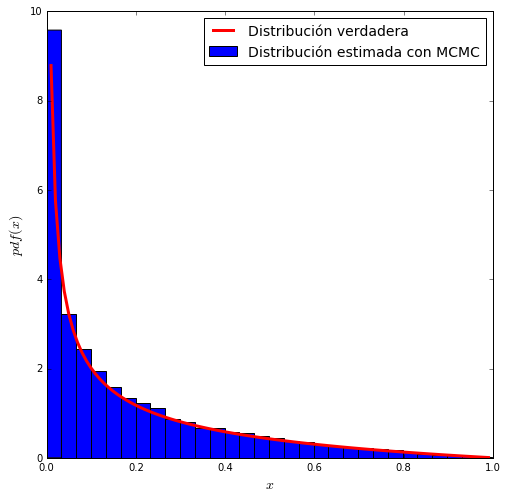

In [11]:
# distribución beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, normed=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

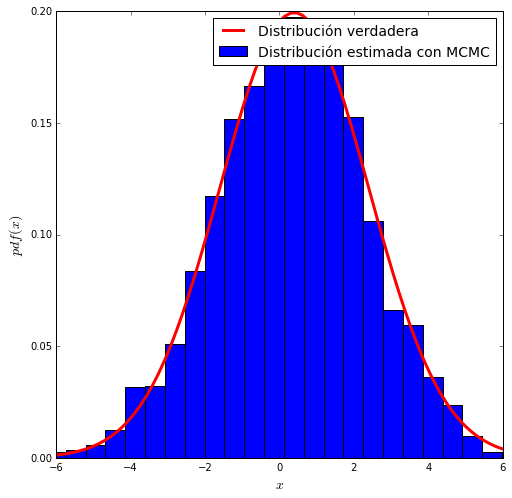

In [12]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, normed=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

como vemos, las [distribuciones](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) estimadas utilizando [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) se acercan bastante a las [distribuciones](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) reales.

### Otros métodos MCMC

Además del [algoritmo Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) existen otros algoritmos de muestreo que utilizan los métodos [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo). Algunos de ellos son:

* **[Muestreo de Gibbs](https://es.wikipedia.org/wiki/Muestreo_de_Gibbs)**, el cual es un caso especial del [algoritmo Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).

* **[Monte-Carlo Hamiltoniano o híbrido](https://en.wikipedia.org/wiki/Hybrid_Monte_Carlo)**, el cual reduce la correlación entre los sucesivos estados de muestreo usando una evolución [Hamiltoniana](https://es.wikipedia.org/wiki/Mec%C3%A1nica_hamiltoniana). 

* **[Muestreo de rebanada o Slice sampler](https://en.wikipedia.org/wiki/Slice_sampling)**, este método se basa en la observación de que para muestrear una [variable aleatoria](https://es.wikipedia.org/wiki/Variable_aleatoria) se pueden tomar muestras en forma uniforme de la región debajo del gráfico de su [función de densidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad).

* **[NUTS o No U turn sampler](https://arxiv.org/abs/1111.4246)**, el cual es una extensión del algoritmo [híbrido de Monte-Carlo](https://en.wikipedia.org/wiki/Hybrid_Monte_Carlo) que logra incluso mayor eficiencia.

Con esto concluye este paseo por los [Métodos de Monte-Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) y la [estadística](http://relopezbriega.github.io/category/pobabilidad-y-estadistica.html) computacional, espero que les haya parecido interesante y les sea de utilidad en sus proyectos.

Saludos!

*Este post fue escrito utilizando IPython notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/MCpy.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/MCpy.ipynb).*